<a href="https://colab.research.google.com/github/alpharomeo7/Spotify-API/blob/main/Copy_of_Spotify_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests, json
import time
class SpotifyAPI:
  def __init__(self):
    self._encoded_client_credentials = '' # Removed token for secuirty 
    self._create_headers()
    self._base_url = 'https://api.spotify.com/v1/'


  def _create_headers(self):
    ## Obtaining bearer token
    #encoded_client_credentials =
    headers = {
        'Authorization': 'Basic ' + self._encoded_client_credentials,
    }

    data = {
      'grant_type': 'client_credentials'
    }

    response = requests.post('https://accounts.spotify.com/api/token', headers=headers, data=data)
    bearer_token = 'Bearer ' + json.loads(response.text)['access_token']

    headers = {
        'Authorization': bearer_token,
    }
    self._headers = headers
    print("New Headers Created")
 
  def _request_api(self, endpoint):
    """
    Requests API and Returns JSON Response
    """
    response = requests.get(self._base_url + endpoint, headers = self._headers)

    if response.status_code == 200:
      return json.loads(response.text)

    if response.status_code == 401: 
      print("Headers Expired")
      self._create_headers()
      self._request_api(endpoint)

    if response.status_code == 429:
      print("Max Request Limit reached")
      time.sleep(3)
      self._request_api(endpoint)
   
  def album(self, album_id): 
    return self._request_api('albums/{}'.format(album_id))
    
  def artist(self, artist_id): 
    return self._request_api('artists/{}'.format(artist_id))
    
  def albums_of(self, artist_id): 
    return self._request_api('artists/{}/albums?limit=50'.format(artist_id))['items']

  def tracks_of_(self, album_id): 
    return self._request_api('albums/{}/tracks?limit=50'.format(album_id))['items']

  def audio_analysis_of(self, track_ids):
    results = []
    query = ','.join(track_ids)
    response = self._request_api('audio-features/?ids='+query)
    if(response is None): 
      return[]
    results +=  response["audio_features"]
    return results
  
  def top_tracks_of(self, artist_id,country): 
    print(self._base_url + 'artists/{}/top-tracks'.format(artist_id))
    return self._request_api('artists/{}/top-tracks'.format(artist_id))

  def search_artist(self, name): 
    try: 
      return self._request_api('search?q=' + name+ '&type=artist')['artists']['items'][0]
    except: 
      return None

    


    
   



In [ ]:
s = SpotifyAPI()


class Album:
  def __init__(self, album_id): 
    self._album_id = album_id
    self.info = s.album(self._album_id)
    self._tracks = self.info['tracks']['items']



  def analyze(self): 
    track_ids = [track['id'] for track in self._tracks] 
    self._analyzed_tracks = [track for track in s.audio_analysis_of(track_ids) if track]
    for a_track in self._analyzed_tracks: 
        track = self._get_track(a_track['id'])
        a_track['name'] = track['name']
        a_track['album'] = self.info['name']
        a_track['release_date'] = self.info['release_date']
        a_track['release_year'] = int(self.info['release_date'][:4])
        a_track['genres'] = self.info['genres']
    return self._analyzed_tracks
  
  def _get_track(self,track_id): 
    for track in self._tracks: 
      if track['id'] == track_id: 
        return track

  def __repr__(self): 
    return self.info['name']
 
    

class Artist: 
  def __init__(self,artist_id): 
    self.info = s.artist(artist_id) 
    self._album_ids = [ a['id'] for a in s.albums_of(artist_id)]
    self.albums = [Album(album_id) for album_id in self._album_ids]
    self.info['albums'] = len(self.albums)
    self.info['first_release_date'] = min([a.info['release_date'] for a in self.albums])
    self.info['last_release_date'] = max([a.info['release_date'] for a in self.albums])
    #self.top_tracks = s.top_tracks_of(artist_id)
    self.analyzed_tracks = []
  
  def analyze(self):
    for album in self.albums: 
      self.analyzed_tracks += album.analyze()
    return self

  def save(self):
    with open(self.info['id']+'.json','w') as outputfile: 
      json.dump({'info':self.info, 'analyzed_tracks': self.analyzed_tracks},outputfile, indent = "\t")


New Headers Created


In [ ]:
album = Album('3oIFxDIo2fwuk4lwCmFZCx')
a_tracks = album.analyze()
a_tracks



In [ ]:
artist = Artist('50JJSqHUf2RQ9xsHs0KMHg')
artist.analyze()



Max Request Limit reached
Max Request Limit reached
Max Request Limit reached


In [ ]:
artist.analyzed_tracks

In [ ]:
a = artist
for alb in a.albums: 
  print(alb.info['name'] + ":\t \t " + str(alb.info['genres']))


In [ ]:
import pandas as pd
df = pd.DataFrame(artist.analyzed_tracks)


In [ ]:
l = list(df.groupby('album').max()['tempo'].to_dict().keys())
print(l[8])

Beautiful People (Acoustic)


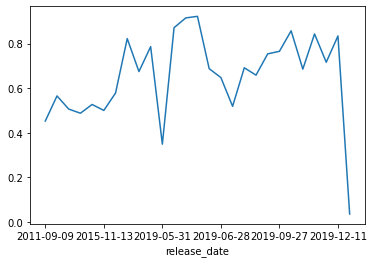

In [ ]:
df.groupby('release_date').mean()['energy'].plot()

In [ ]:
s.top_tracks_of('6eUKZXaKkcviH0Ku9w2n3V')

https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V/top-tracks
Headers Expired
New Headers Created


In [ ]:
(s.search_artist('Jon bellion'))


{'external_urls': {'spotify': 'https://open.spotify.com/artist/50JJSqHUf2RQ9xsHs0KMHg'},
 'followers': {'href': None, 'total': 1139176},
 'genres': ['pop rap'],
 'href': 'https://api.spotify.com/v1/artists/50JJSqHUf2RQ9xsHs0KMHg',
 'id': '50JJSqHUf2RQ9xsHs0KMHg',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/c130cf4ab4e8a9b8046153102bccedae5ad6d8ed',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/c770a7f543478385ca9d69f050eb010781cd4399',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/8bf432a5ebaa42ac0a13209ee2b627506d10b92b',
   'width': 160}],
 'name': 'Jon Bellion',
 'popularity': 76,
 'type': 'artist',
 'uri': 'spotify:artist:50JJSqHUf2RQ9xsHs0KMHg'}

In [ ]:
a.analyzed_tracks[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'name', 'album', 'release_date', 'release_year', 'genres'])

In [ ]:
Artist('6eUKZXaKkcviH0Ku9w2n3V').analyze().save()

https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V/top-tracks


In [ ]:
artist.info

{'albums': 50,
 'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
 'first_release_date': '2011-09-09',
 'followers': {'href': None, 'total': 71661189},
 'genres': ['pop', 'uk pop'],
 'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
 'id': '6eUKZXaKkcviH0Ku9w2n3V',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/f55cab0739390cf3b2c2f773b9c779b2f0ae8a99',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/31e1cfee4ec3849bf3036a037cbbf57239f5c7a2',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/f2e3eb4c81da6cd2f32036ab0946c6bbfe4a86b7',
   'width': 160}],
 'last_release_date': '2019-12-11',
 'name': 'Ed Sheeran',
 'popularity': 93,
 'type': 'artist',
 'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}

In [ ]:
json_str = """
var {field} = document.getElementById("{field}Chart").getContext('2d');
var {field}Chart = new Chart({field}, {{
type: 'line',
data: {{
labels: {keys},
datasets: [
    {{
        label: "Mean",
        data: {meanData},
        backgroundColor: [
        'rgba(28,153,68,0.27)',
          ],
            borderColor: [
        'rgba(107,241,30,0.74)',
        ],
          borderWidth: 2
      }},
 {{
        label: "Max",
        data:{maxData},
        backgroundColor: [
        'rgba(108,3,15,0.95)',
          ],
            borderColor: [
        'rgba(244,22,67,0.8)',
        ],
          borderWidth: 2,
          showLine: false
      }},
{{
        label: "Min",
        data: {minData},
         backgroundColor: [
        'rgb(193,184,0)',
          ],
            borderColor: [
        'rgba(244,117,14,0.8)',
        ],
          borderWidth: 2,
          showLine: false
      }}


]
}},
options: {{
responsive: true
}}
}});

"""




for f in list(df.columns[:11]): 
  keys = list(df.groupby('chart_label').mean()[f].to_dict().keys())
  meanData = list(df.groupby('chart_label').mean()[f].to_dict().values())
  minData = list(df.groupby('chart_label').min()[f].to_dict().values())
  maxData = list(df.groupby('chart_label').max()[f].to_dict().values())
  print(json_str.format(maxData=maxData,keys=keys,minData = minData, meanData = meanData,field=f))
  print("\n")




In [ ]:
str = """
        <div class="row">
          <div class="col-12">
            <div class="card card-chart">
              <div class="card-header ">
                <div class="row">
                  <div class="col-sm-6 text-left">
                    <h2 class="card-title">{ft}</h2>
                </div>
              </div>
              <canvas id="{f}Chart"></canvas>
            </div>
          </div>
        </div>
      </div>
"""
for f in list(df.columns[:11]): 
  print(str.format(f=f, ft=f.title()))

  print("\n \n ")

In [ ]:
"a".title()

'A'

In [ ]:
import str

ModuleNotFoundError: ignored